## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('data/human_body_temperature.csv')

# Question 1

1. Is the distribution of body temperatures normal?

   We can use a histogram of temperature values to determine this.

In [5]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

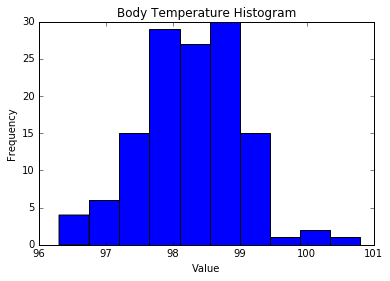

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

#the histogram generated by this code shows that the data are roughly normally distributed (e.g. have a bell curve shape)

plt.hist(df.temperature)

plt.title("Body Temperature Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Question 2 Is the true population mean really 98.6 degrees F?

We'll use a z-test for this because the sample size is n = 130. For n >= 30, we use z-tests

In [10]:
# Null hypothesis - The population mean is 98.6 degrees F
# Hypothesis - The population mean is not 98.6 degrees F

# We'll assume the null hypothesis. We don't have a significance level for the test so we'll assume a 5% significance. That means
# that the z-statistic needs to fall between -1.96 and 1.96 in order for us to accept the null hypothesis.

# first, let's evaluate the sample mean and standard deviation

import numpy as np

temp_pop_mean = 98.6
sample_size = df.temperature.size
temp_sample_mean = np.mean(df.temperature)
temp_sample_std = np.std(df.temperature)

# calculate the z-statistic which is the
# sample mean - assumed population mean divided by the standard deviation of the sample

round((temp_sample_mean - temp_pop_mean) / (temp_sample_std / np.sqrt(sample_size)), 3)

# -5.476 does not fall within the acceptable range so we reject the null hypothesis and state that the true population mean
# is not likely to be 98.6 degrees F.


-5.476

# Question 3 At what temperature should we consider someone's temperature to be "abnormal"?

The suggestion here is to compute the margin of error and the confidence interval.

Again, there's no suggestion of what we should be using for the alpha (significance) - so we'll assume the ever popular 95% (critical value of 1.65 according to the z-tables).

The margin of error is the critical value (Z-statistic) x standard deviation of the statistic

The confidence interval then is the mean + or - the margin of error

Any temperature falling outside the confidence interval is therefore considered "abnormal".

In [11]:
# critical value * std of sample

critical_value = 1.96

margin_of_error = critical_value * temp_sample_std

# now calculate the high and low intervals

low_interval = temp_sample_mean - margin_of_error
high_interval = temp_sample_mean + margin_of_error

In [22]:
print('A temperature is considered abnormal if it falls outside the range of ' + str(round(low_interval,1)) + ' to ' \
+ str(round(high_interval,1)) + ' degrees farenheit.')

A temperature is considered abnormal if it falls outside the range of 96.8 to 99.7 degrees farenheit.


# Question 4 Is there a significant difference between males and females in normal temperature?

So this will be a two sample test of the differences of the means - so now we need to work with two different samples from the same data file - one for males and one for females.

In [14]:
# let's separate out the data sets

male = df[df.gender == 'M']
female = df[df.gender == 'F']

# let's calculate their means

male_mean = np.mean(male.temperature)
female_mean = np.mean(female.temperature)

# and let's do the standard deviations while we're at it

male_std = np.std(male.temperature)
female_std = np.std(female.temperature)

# calculate the difference in the means

mean_diff = male_mean - female_mean

# the null hypothesis, which we'll assume to be true, is that there is no difference between the temperatures in men and women
# in other words, that the male_mean = female_mean
# we'll assume a 95% confidence interval (or a significance, alpha, of 5%)
# again, using the z-table, this gives us a value of 1.96

# need to calculate the square of SD of both samples, divided by their sample size, add them together, take the square root
# also known as the standard error or se

se = np.sqrt(((male_std * male_std)/male.size) + ((female_std * female_std)/female.size))

# calculate the zscore which is the mean difference in the samples divided by the standard error

zstat = mean_diff / se

print('Because the z statistic is ' + str(round(zstat,2)) + ', the null hypothesis is rejected, meaning that there is ' \
     + 'a difference between the temperatures of men and women.')


Because the z statistic is -3.99, the null hypothesis is rejected, meaning that there is a difference between the temperatures of men and women.
